* Funciones de Costo
* Funciones de Error
* Redes Neuronales

# Funciones de Costo

Hay una interseccion grande entre funciones de costo y funciones de error.
Vamos a ver similutes y diferencias en esta clase:

Veremos:

* Mean Square Error (MSE). Error minimo cuadrado. Desde el punto de vista de la estadistica $MSE \rightarrow \mathbb{V}[ h(x, \theta) - y ]$ 

$$ C(\theta) = \frac1m \sum_{i=1}^m (h(\theta, x_i) - y_i)^2 + \frac{\lambda}{2 n} \sum_{i=1}^n \theta_i^2$$
Esta funcion se usa tipicamente para resolver minimos cuadrados, regresion lineal , etc

Si tuvieramos un problema de clasificacion binaria (si, no, o 1 o 0, blanco y negro, o perros o gatos)

Podemos usar la funcion Sigmoid: (logistic function)

\begin{eqnarray}
h(\theta, x_i) = \frac{1}{1 + \exp( - x_i^T \theta)}
\end{eqnarray}

* Cross Entropy (entropia cruzada).

$$C(\theta) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)}) ] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]  + \frac{\lambda}{2 n} \sum_{j=1}^n \theta_j^2  $$

Cuando $\lambda=0$ ignoramos la regularizacion

Se usa para regresion logistica.

* Categorical Cross-Entropy loss (funcion de costo categorica con entropia cruzada).

Este es el caso de una regresion logistica multi clase. De mas de dos clase: gatos, perros, tortugas. (3 clases: K=3).

Para este tipo de problemas de clasificacion se usan los llados *one-hot-encoded vectors*  (vectores codificados con unos y ceros).


$$ \text{gato} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} \quad , \quad \text{perro} \leftarrow \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}  \quad , \quad \text{cerdo} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} $$

La funcion de costo esta dada por:

$$ C(\theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log[ h_k(\theta, x_i) ] - (1 - y_i^{(k)}) \log [ 1 - h_k(\theta, x_i) ] + \frac{\lambda}{2 n} \sum_{j=1}^n \theta_j^2 $$



Necesitamos una funcion que juege el papel de probabilidad para $h_k(\theta, x_i)$ . Cuando eran dos clases solamente usamos el Sigmoid function (la logistica) pero aca tenemos mas clases y necesitamos extender el problema.

Cual es esa funcion?

\begin{eqnarray}
\sigma : \mathbb{R}^K &\to&[0,1]^K \\
(z_i) &\mapsto& \frac{\exp(z_i)}{\sum_{j=1}^k \exp(z_j) } \quad , \quad k=1,2, \cdots, K \quad , \quad z_i \in \mathbb{R} 
\end{eqnarray}

Definamos $h(\theta ,x )$.

\begin{eqnarray}
h(\theta, x) = \begin{pmatrix} P(y=1 \mid  x ;\theta   \\
P(y=2 \mid x ; \theta ) \\
\vdots \\
P(y = K \mid x; \theta ) \end{pmatrix} =
\begin{pmatrix} \sigma(z_1) \\ \sigma(z_2) \\ \vdots \\ \sigma(z_k)  =
\end{pmatrix} =  \frac{1}{\sum_{j=1}^K \exp({\theta^{(j)}}^T x)}
\begin{pmatrix}\exp({\theta^{(1)}}^T x) \\ \exp({\theta^{(2)}}^T x) \\ \vdots \\ \exp({\theta^{(k)}}^T x)
\end{pmatrix}
\end{eqnarray}

Cuales son los pasos para resolver un problema de optimizacion (en aprendizaje profundo y en general)

* Construir la funcion objetivo.
* Hallar el gradiente de la funcion objetivo (costo)
* Usar el gradiente para encontrar el minimo (ojala global). 
* Extraer $\theta$ para este minimo. $\theta$ es el parametro que permite generalizar el ML (DL) a nuevos datos.


Como se halla el gradiente de la funcion de costo categorica.

Lo hicimos para dos clases solamente en el curso de ML.
La metodologia es la misma.


* Escribir la funcion multivariada de probabilidad para cada muestra. 
* Escribir el likelihood (verosimilitud) que debe ser maximixada como un doble producto sobre muestras y clases. 

* Tomar el logaritmo de la funcion de likelihood. Con el objeto de convertir productos en sumas y facilitar los calculos.

* Cambiar el signo para que quede convexa.

Si se hace todo esto obtnemos:

$$ C(\theta) = - \left [ \sum_{i=1}^m \sum_{k=1}^K \mathbb{1} \{ y^{(i)} = k \} \log \frac{\exp( {\theta^{(k)} }^T  x^{(i)} )}{\sum_{j=1}^K \exp( {\theta^{(k)} }^T  x^{(j)} )}
\right ] $$

Esta es la funcion de costo de la regresion multiclase.

Donde




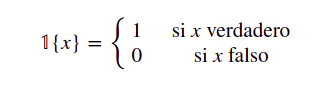

El paso siguiente es calcular el gradiente de la funcion de costo.

Es un ejercicio para el estudiante.
$$ \nabla_{\theta_k} C(\theta) = - \sum_{i=1}^m 
\left [ x^{(i)} \left ( \mathbb{1} \{ y^{(i)}=k   \} - P(y^{(i)} = k \mid x^{(i)}; \theta) \right ) \right ]$$

donde

$$  P(y^{(i)} = k \mid x^{(i)}; \theta) = \log \frac{\exp{z_{ik}}}{\sum_{j=1}^K \mathrm{e}^{z_{ij}}} \quad  , \quad z_{ij} = {\theta^{(i)}}^T x^{(i)} $$

Un comentario intersante. Pude haber multiclase con multi-etiqueta. Por ejemplo:

\begin{eqnarray}
\text{perros y gatos} = \begin{pmatrix} 1 \\ 1 \\ 0\end{pmatrix} \quad , \quad \text{gatos y cerdos} = \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix} \quad, \quad 
\text{perros y cerdos} \begin{pmatrix} 0 \\ 1  \\ 1\end{pmatrix}
\end{eqnarray}

## Metricas de Error

Algunas vecdes las mismas funcion de costo se confunden con las metrias de error. 

Hablemos un poco de las metricas basadas en la matriz de confusion.


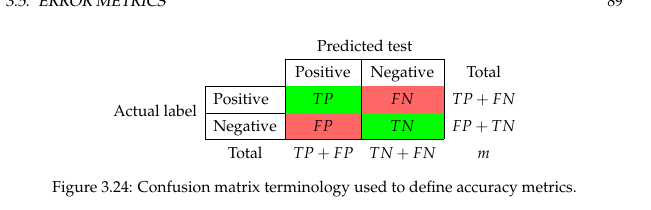

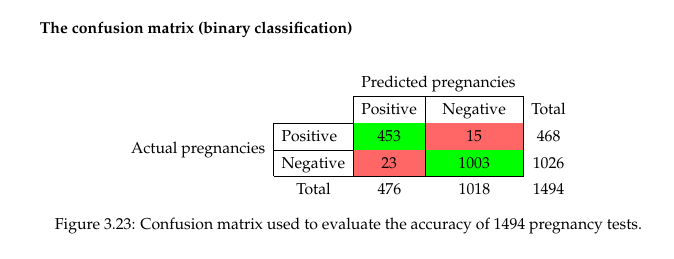

La matriz de las figuras de arriba se llama la matriz de confusion.


De esta matriz vamos a definir algunas metricas:

* Accuracy: 

$$ \text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}= \frac{TP + TN}{m} $$

* misclassification rate (rata de clasificacion errada).
Es lo contrario 


$$ \text{missclassificaiton rate} = \frac{FP + FN}{m} $$

$$ \text{precision} = \frac{TP}{TP + FP}  $$

$$ \text{recall} = \frac{TP}{TP + FN}$$

# Redes Neuronales (ANN: Artificial Neural Networks).

### INtroduccion: Las redes neuronales artificiales tienen un soporte teorico en lo que llaman el "universal approximators" 

Historicamente el *perceptron* fue el precursor de las redes neuronales modernas. En 1958 , Frank Rosenblatt en Cornell Aeronatuical Laboratory estudio las primeras redes neuronales que se aproximan a las de hoy.

Un ejemplo que hicimos en ML.

Queremos ir a un lugar (paseo).

* Distancia al lugar
* Modo de viaje: avion, carro, a pie, barco, etc.
* Clima del lugar a donde vamos
* humedad
* costo

Para estas cosas hay "pesos". 

* Que tanto nos guasta alejarnos de nuestras casas.
* Que tanto nos gusta camiar. Le tengo panico a los aviones, o a los botes.
* Odio el clima calido y la humedad
* Que tanta plata quiero gastar.

El perceptron asemeja la decision de ir o no ir al paseo.




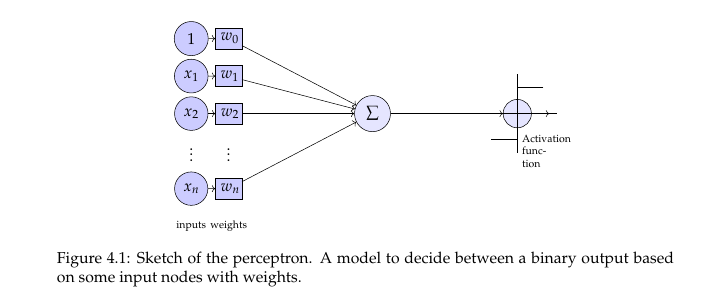

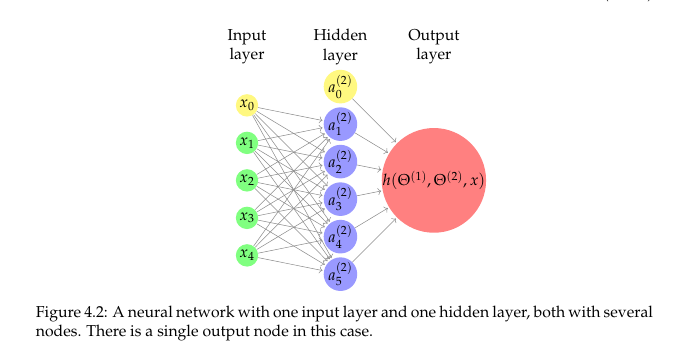

La idea moderna de ANN es la del multilayer perceptron como el de arriba. Tiene una capa de entrada, una oculta y una de salida.

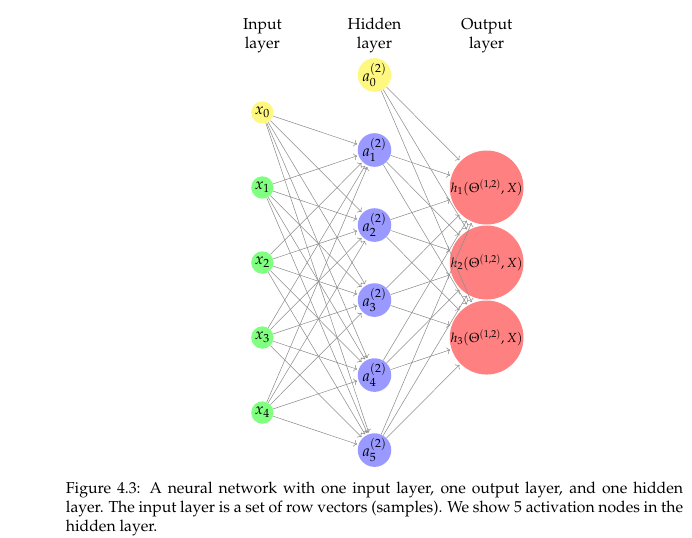